In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos pasa pandas en el Notebook
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

Aqui se inicia la lectura con los datos ya limpios en un solo csv, que se recupera de la carpeta de data/processed.

Mi pregunta para scrapear la web de vivino es para saber 

### ¿Cuales son los mejores vinos por rating y valoraciones más altas de cada Pais?


In [3]:
vinos_df = pd.read_csv("../src/data/processed/vinos_total.csv")
vinos_df

,Pais,Tipo,Bodegas,Nombre y año,Región,Rating,Valoraciones,Precio,Año
0,España,Tinto,Vega Sicilia,Unico 2010,Ribera del Duero,4.8,1571,380.55,2010
1,España,Tinto,Vega Sicilia,Unico Reserva Especial Edición 2018,Ribera del Duero,4.8,462,484.00,2018
2,España,Tinto,Vega Sicilia,Unico Reserva Especial Edición 2019,Ribera del Duero,4.8,261,471.90,2019
3,España,Tinto,Toro Albalá,Don PX Convento Selección 1931,Montilla-Moriles,4.8,159,300.93,1931
4,España,Tinto,Vega Sicilia,Unico Reserva Especial Edición 2020,Ribera del Duero,4.8,97,435.75,2020
...,...,...,...,...,...,...,...,...,...
5995,Italia,Blanco,Feudi di San Gregorio,Greco Di Tufo Cutizzi 2020,Greco di Tufo,3.9,514,22.44,2020
5996,Italia,Blanco,Argiolas,Costamolino Vermentino di Sardegna 2021,Vermentino di Sardegna,3.9,427,13.50,2021
5997,Italia,Blanco,Punica,Samas 2018,Isola dei Nuraghi,3.9,328,16.90,2018
5998,Italia,Blanco,Della Staffa,Litrò Bianco 2019,Umbria,3.9,292,14.95,2019


De los datos scrapeados de la página de Vivino, como resultado final, tenemos 6000 filas y 9 columnas, que corresponde a:
* 1000 vinos tintos  y 1000 blancos españoles
* 1000 vinos tintos  y 1000 blancos portugueses
* 1000 vinos tintos  y 1000 blancos italianos

* Mis datos cuantitativos son : Rating (Float), Precio (Float) y Valoraciones (Int)
* Mis ddatos cualitativos son : Pais (Object), tipo (Object), Región (Object), Nombre y año (Object), Año (Object) y Bodegas (Object)
* 3 variables númericas y 6 categóricas

Aqui se refleja la densidad de la columna Rating donde se concentra más desde 3.25 hasta 5.00 donde el punto de más densidad por encima del 1.75 entra los Rating entre 4.00 y 4.5 siendo la mediana 4.3 

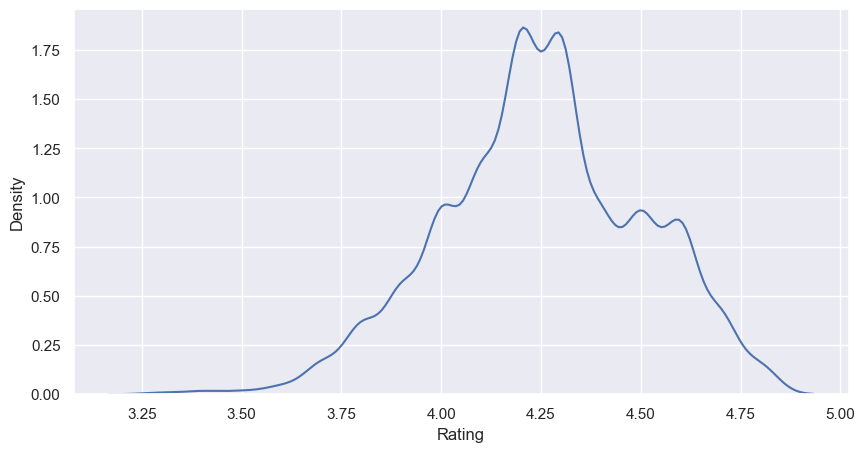

In [4]:
plt.figure(figsize=(10,5))
sns.kdeplot(vinos_df['Rating']);

In [5]:
vinos_df.Rating.median().round(2)

4.3

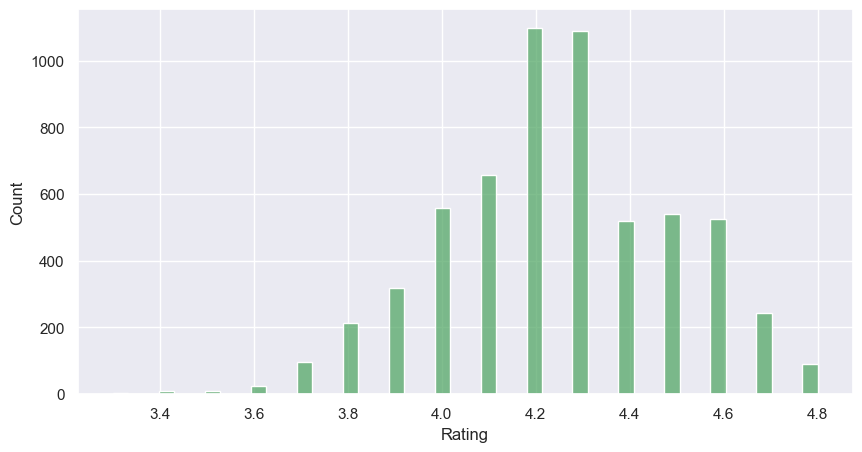

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(vinos_df['Rating'], kde=False, color = "g");

el mayor número de Valoraciones es de 63661, la media de los  mejores valorados es de 685 valoraciobes 

In [7]:
vinos_df.Valoraciones.describe().round(2)

count     6000.00
mean       685.80
std       3000.14
min         25.00
25%         61.00
50%        140.00
75%        429.00
max      63661.00
Name: Valoraciones, dtype: float64

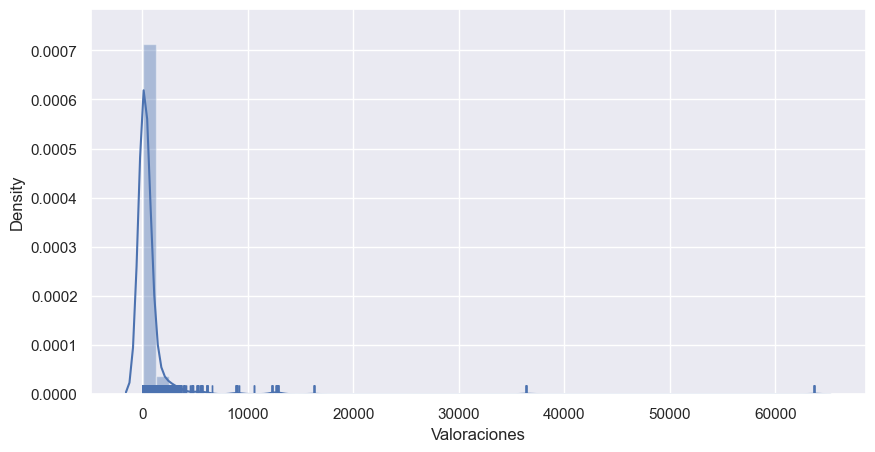

In [8]:
plt.figure(figsize=(10,5))#rug --> moqueta, pinta solo las muestras
sns.distplot(vinos_df['Valoraciones'],
            rug=True);

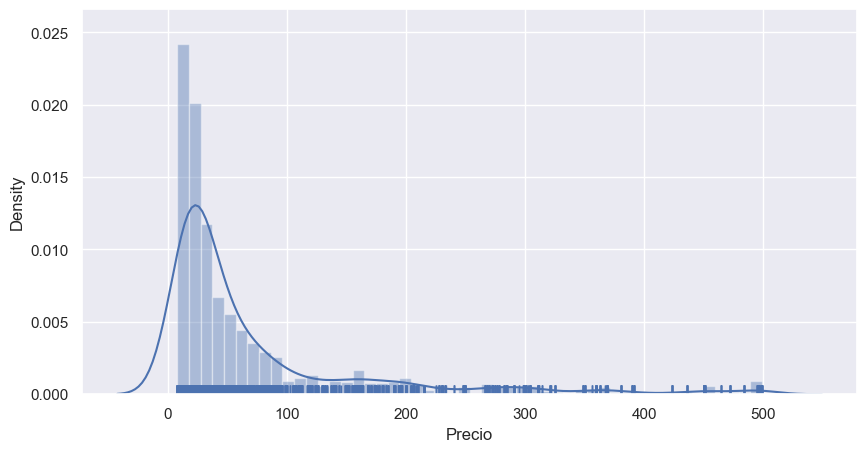

In [9]:
plt.figure(figsize=(10,5))#rug --> moqueta, pinta solo las muestras
sns.distplot(vinos_df['Precio'],
            rug=True);

### Variable cualitativa Pais, en el que se refleja que hay en Data Frame 2000 de casa pais

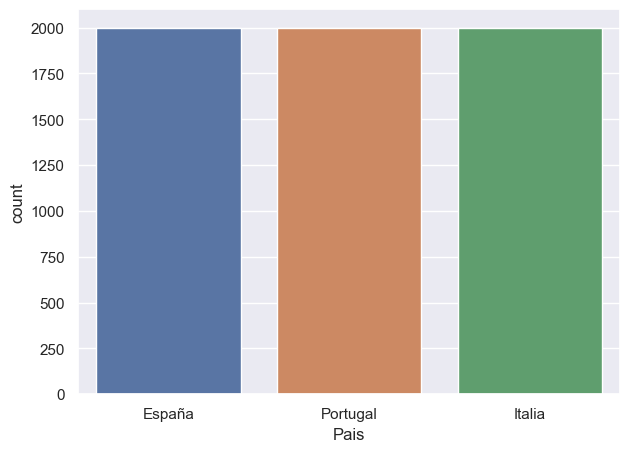

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x = vinos_df['Pais']);

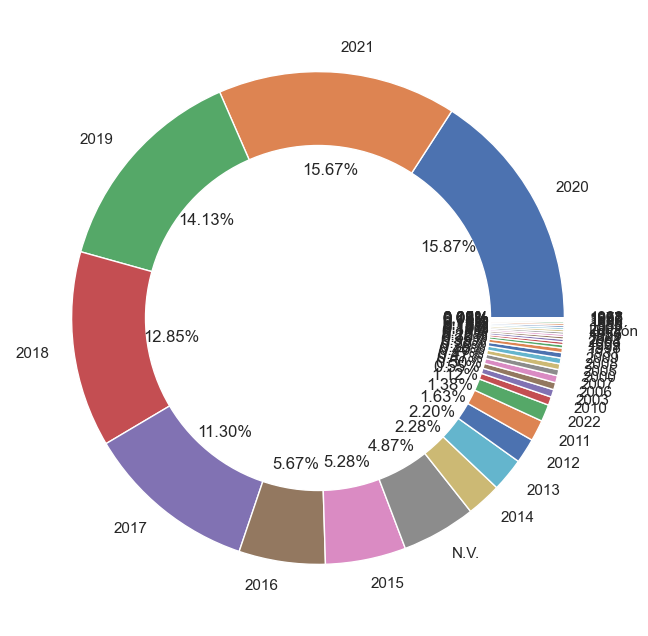

In [11]:
import matplotlib.pyplot as plt
 
# create data
data = vinos_df['Año'].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<AxesSubplot:>

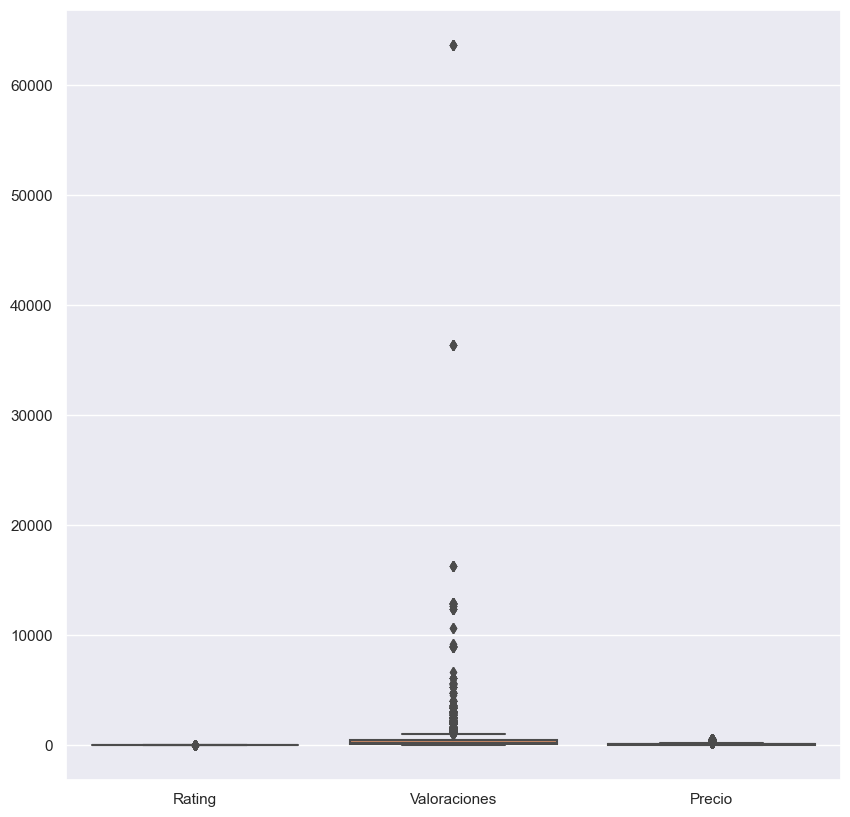

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(data=vinos_df[vinos_df.columns.values[::]])

<AxesSubplot:>

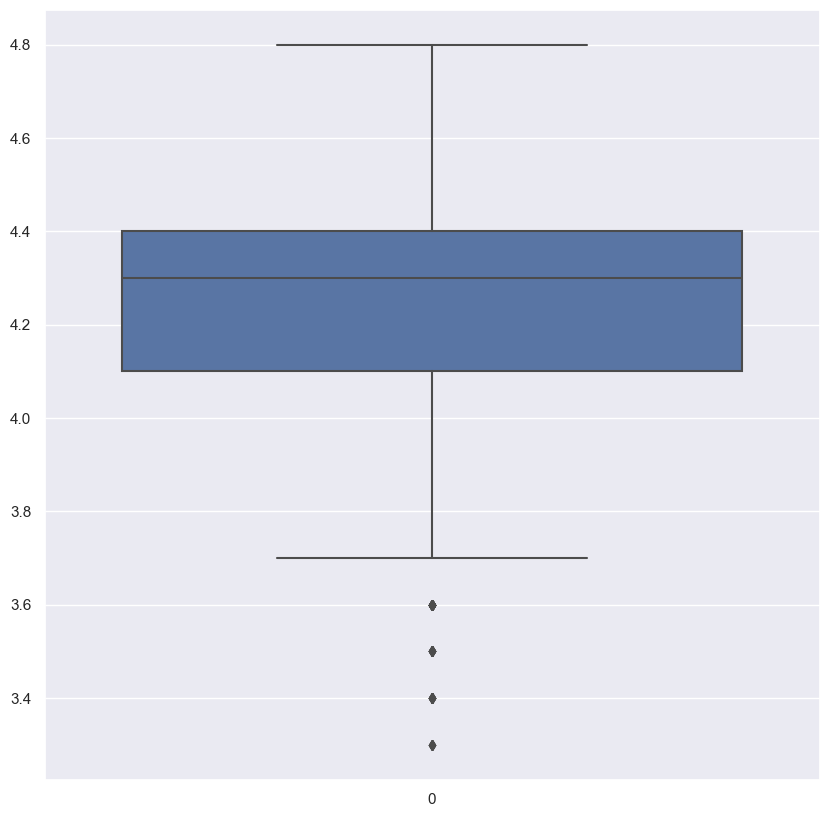

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(vinos_df.Rating)

In [14]:
[vinos_df[vinos_df['Pais'] == 'España'][vinos_df.columns.values[5:-1:]]]

[      Rating  Valoraciones  Precio
 0        4.8          1571  380.55
 1        4.8           462  484.00
 2        4.8           261  471.90
 3        4.8           159  300.93
 4        4.8            97  435.75
 ...      ...           ...     ...
 1995     4.2           146   26.93
 1996     4.2           143   12.90
 1997     4.2           140   22.40
 1998     4.2           140   50.75
 1999     4.2           135   19.43
 
 [2000 rows x 3 columns]]

<AxesSubplot:ylabel='Density'>

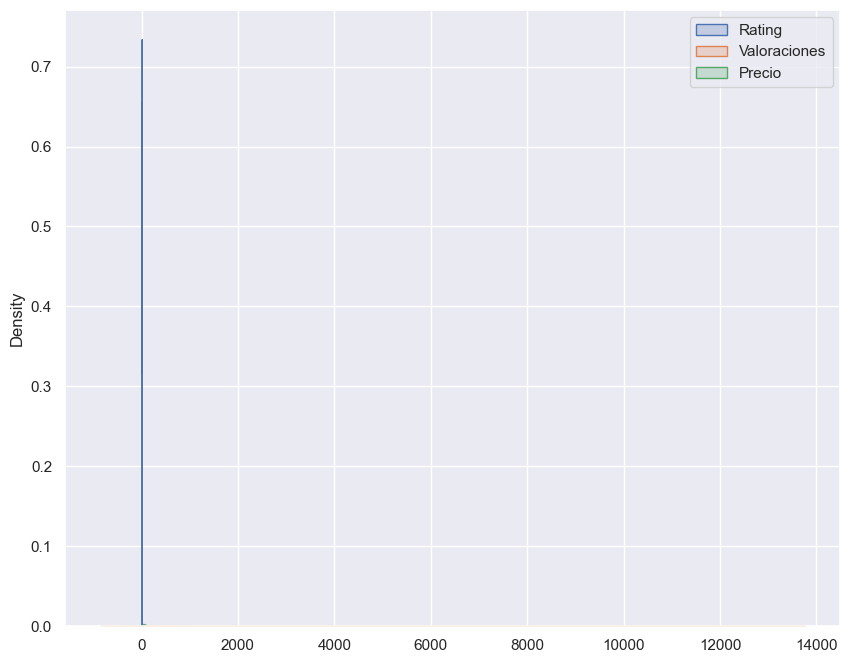

In [15]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = vinos_df[vinos_df['Pais'] == 'España'][vinos_df.columns.values[5:-1:]], shade = True)

### Esto es de tableau

<img src="./assets/Rating_bodegas.png" >